In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta  
import numpy as np

df = pd.read_parquet('gridMet.parquet.gz')

In [2]:
df.head()

precipitation_amount_mm  \
date       latitude  longitude                              
2000-01-01 33.566667 -117.975000                      0.0   
                     -117.933333                      0.0   
                     -117.891667                      0.0   
                     -117.850000                      0.0   
                     -117.808333                      0.0   

                                  relative_humidity_%  \
date       latitude  longitude                          
2000-01-01 33.566667 -117.975000                 40.5   
                     -117.933333                 40.9   
                     -117.891667                 41.2   
                     -117.850000                 40.8   
                     -117.808333                 38.2   

                                  specific_humidity_kg/kg  \
date       latitude  longitude                              
2000-01-01 33.566667 -117.975000                  0.00600   
                     -117.933333                  0.00593   
                     -117.891667                  0.00580   
                     -117.850000                  0.00577   
                     -117.808333                  0.00547   

                                  surface_downwelling_shortwave_flux_in_air_W m-2  \
date       latitude  longitude                                                      
2000-01-01 33.566667 -117.975000                                            139.7   
                     -117.933333                                            136.6   
                     -117.891667                                            133.2   
                     -117.850000                                            129.8   
                     -117.808333                                            126.5   

                                  wind_from_direction_Degrees Clockwise from north  \
date       latitude  longitude                                                       
2000-01-01 33.566667 -117.975000                                             222.0   
                     -117.933333                                             222.0   
                     -117.891667                                             222.0   
                     -117.850000                                             218.0   
                     -117.808333                                             218.0   

                                  wind_speed_m/s  max_air_temperature_K  \
date       latitude  longitude                                            
2000-01-01 33.566667 -117.975000             2.1                  292.0   
                     -117.933333             2.1                  291.9   
                     -117.891667             2.3                  292.1   
                     -117.850000             2.4                  292.0   
                     -117.808333             2.5                  292.6   

                                  min_air_temperature_K  \
date       latitude  longitude                            
2000-01-01 33.566667 -117.975000                  282.2   
                     -117.933333                  282.2   
                     -117.891667                  282.1   
                     -117.850000                  281.4   
                     -117.808333                  281.0   

                                  burning_index_g_Unitless  \
date       latitude  longitude                               
2000-01-01 33.566667 -117.975000                      31.0   
                     -117.933333                      32.0   
                     -117.891667                      33.0   
                     -117.850000                      34.0   
                     -117.808333                      37.0   

                                  dead_fuel_moisture_100hr_Percent  \
date       latitude  longitude                                       
2000-01-01 33.566667 -117.975000                              12

In [3]:
#df.loc[('2000-01-01', slice(None)), :]

#df.iloc[(slice(2044,2048,None))]

# def multindex_iloc(df, index):
#     label = df.index.levels[0][index]
#     return df.iloc[df.index.get_loc(label)]

#df.loc[[df.index.get_level_values(0)[0]]]

In [155]:
omg  = df.xs('2005-10-23', level=0, axis=0, drop_level=True)
omg1 = df.xs('2006-10-23', level=0, axis=0, drop_level=True)
omg2 = df.xs('2007-10-23', level=0, axis=0, drop_level=True)

In [157]:
lats = len(omg.index.levels[0])
lons = len(omg.index.levels[1])

z = np.zeros(shape=(lats,lons))
z1 = np.zeros(shape=(lats,lons))
z2 = np.zeros(shape=(lats,lons))


for i in range(0,lats):
    for j in range (0,lons):
        row_num= i*lons + j
        z[i,j] = omg.iloc[(slice(row_num,row_num+1,None)),6]
        z1[i,j] = omg1.iloc[(slice(row_num,row_num+1,None)),6]
        z2[i,j] = omg2.iloc[(slice(row_num,row_num+1,None)),6]

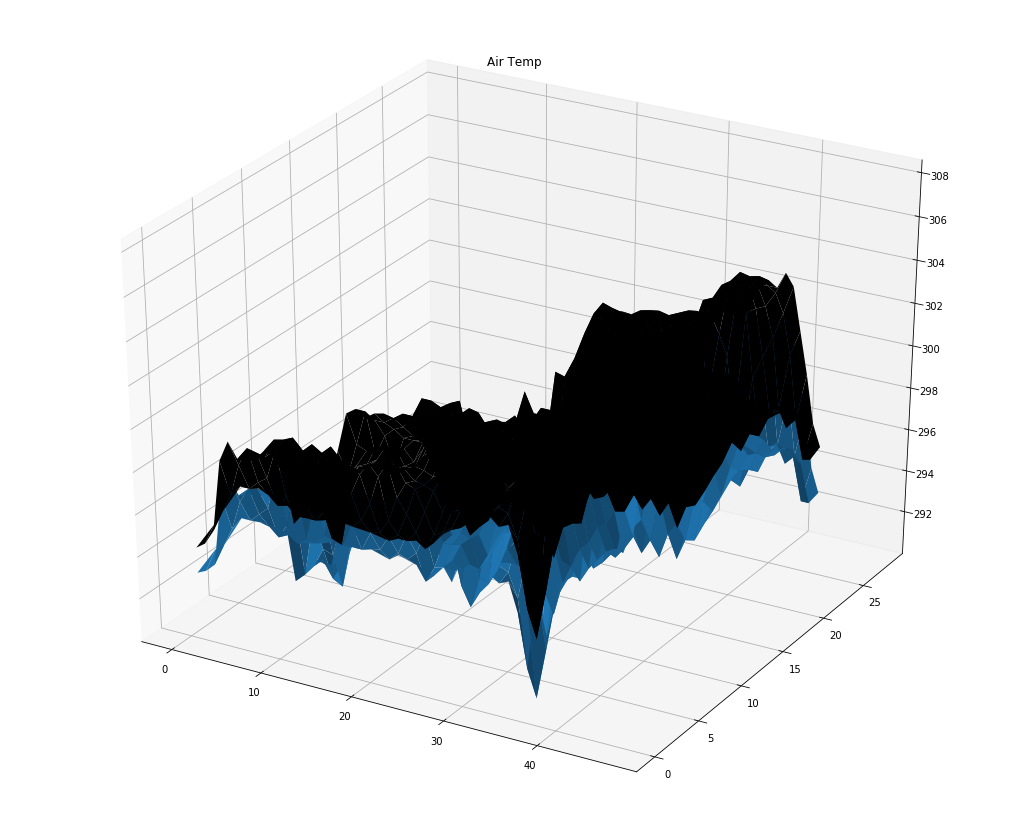

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline


fig = plt.figure(figsize=(40,15))
ax1 = fig.add_subplot(121, projection='3d')
#ax2 = fig.add_subplot(122, projection='3d')

x= np.arange(0, lats, 1)
y= np.arange(0, lons, 1)
X, Y = np.meshgrid(y, x)
Z= z
Z1 = z1
Z2 = z2

# Plot a basic wireframe
#ax1.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax1.set_title('Air Temp')
ax1.plot_surface(X, Y, Z)
ax1.plot_surface(X, Y, Z1,color='black')
#ax1.plot_surface(X, Y, Z2,color='orange')

#ax1.view_init(0, 0)
#ax1.contour3D(X, Y, Z)


# ax2.plot_wireframe(X, Y, Z, rstride=20, cstride=20)
# ax2.set_title('row step size 20, column step size 20')

# rotate the axes and update
# for angle in range(0, 360):
#     ax1.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

#plt.show()

In [ ]:
# 33.067338, -116.741989 --> Witch Fie Lat[16] and Lon[29] started on 23rd Oct

In [316]:
Fire_date = '2007-10-23'   #Date of Fire
time_aggregation =  7      #To aggregate weather data over xx (measured in days)
years_of_history = 5       #How far back ew want to see the trend
Fire_latitude_index = 16   #Closest index of the latitude where fire happened (Write a funtion to extract this later)
Fire_longitude_index = 29  #closest index of the longitude where fire happened
Grid_Range = 7             #Region around the grid to see spatial info
index_feat_of_interest =8  #Which particular attribute of weather we want to check

Getting data for date 2007-10-23
Getting data for date 2006-10-23
Getting data for date 2005-10-23
Getting data for date 2004-10-23
Getting data for date 2003-10-24


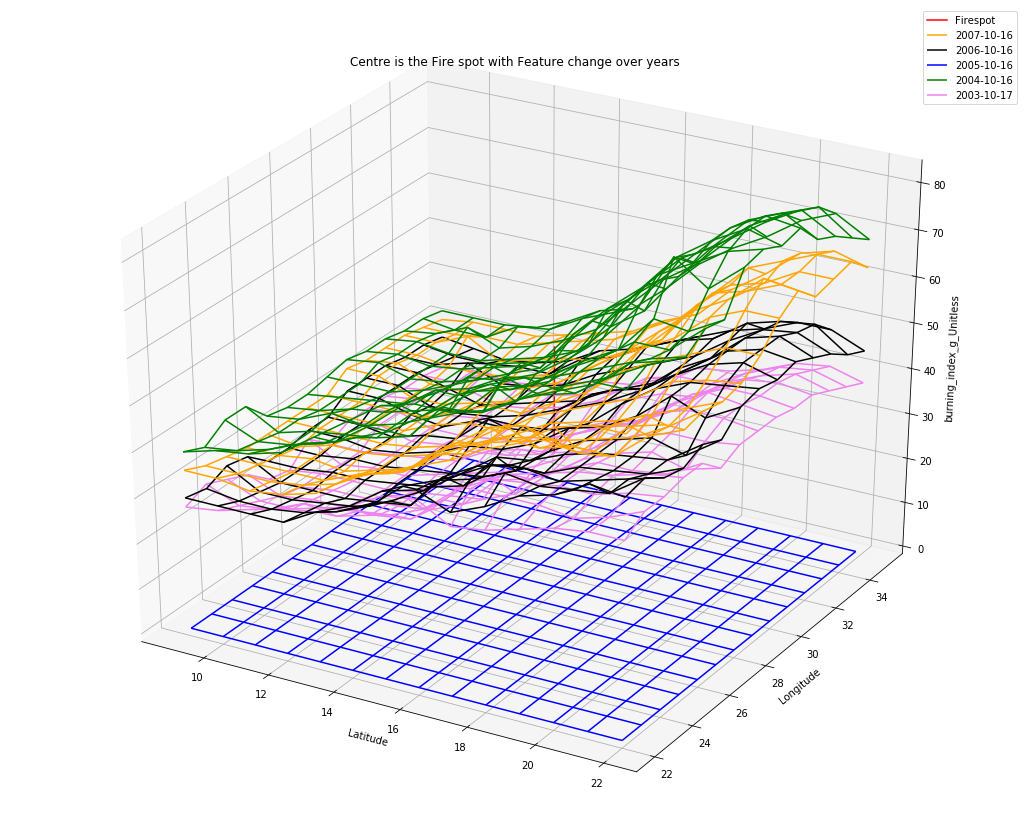

In [317]:
fig = plt.figure(figsize=(40,15))
ax1 = fig.add_subplot(121, projection='3d')
color_list = ['orange','black','blue','green','violet','yellow','purple']
x= np.arange(Fire_latitude_index-Grid_Range, Fire_latitude_index+Grid_Range, 1)
y= np.arange(Fire_longitude_index-Grid_Range, Fire_longitude_index+Grid_Range, 1)
X, Y = np.meshgrid(x, y)

flag=0
for year in range(0,years_of_history):
    proc_date = str(datetime.strptime(Fire_date, "%Y-%m-%d").date()-timedelta(days=year*365))
    print ("Getting data for date",proc_date)
    z = np.zeros(shape=(Grid_Range*2,Grid_Range*2))

    #Aggregate Weather data over time-series
    if time_aggregation >0 :  
        dfs = {}
        for time_agg in range(time_aggregation):
            proc_date_lag = str(datetime.strptime(proc_date, "%Y-%m-%d").date()-timedelta(days=1))
            #print ("Getting data for date",proc_date_lag)
            dfs[i] = df.xs(proc_date_lag, level=0, axis=0, drop_level=True)
            proc_date = proc_date_lag

        panel = pd.Panel(dfs)
        sliced_df =    panel.mean(axis=0)
    else:
        sliced_df = df.xs(proc_date, level=0, axis=0, drop_level=True)
    #Get the weather attribute of interest for all the years
    for i in range(Fire_latitude_index-Grid_Range, Fire_latitude_index+Grid_Range):
        for j in range (Fire_longitude_index-Grid_Range, Fire_longitude_index+Grid_Range):
            row_num = i*lons + j
            z[i-(Fire_latitude_index-Grid_Range),j-(Fire_longitude_index-Grid_Range)]  = sliced_df.iloc[(slice(row_num,row_num+1,None)),index_feat_of_interest]
    flag = max(flag,z[7,7])
    if flag>0:
        min_flag=min(flag,z[7,7])
    Z= z
     # Plot a basic wireframe
    ax1.plot_wireframe(X, Y, Z,label=proc_date,color=color_list[year])
    #ax1.plot_surface(X, Y, Z,label=proc_date,color=color_list[year])

    
#ax1.bar(np.arange(Fire_latitude-5, Fire_latitude+5, 1),100,zdir='y')
ax1.set_title('Centre is the Fire spot with Feature change over years')
ax1.set_zlabel(sliced_df.columns[index_feat_of_interest], fontdict=None, labelpad=None)
ax1.set_ylabel('Longitude', fontdict=None, labelpad=None)
ax1.set_xlabel('Latitude',  fontdict=None, labelpad=None)
ax1.plot([x[Grid_Range],x[Grid_Range]],[y[Grid_Range],y[Grid_Range]],[min_flag,flag+3],color='red',label='Firespot')
ax1.legend() 

#ax1.view_init(0, 0)
#ax1.contour3D(X, Y, Z)